In [25]:
import polars as pl
import seaborn as sns
from paths import DATASET_SIZES
import matplotlib.pyplot as plt

In [20]:
filter_benchs = pl.read_csv("group.csv").select("dataset_size", "tool", "cpu_count", "time_in_seconds")
grouped_filter_benchs = filter_benchs.group_by("dataset_size", "tool", "cpu_count").mean().sort(by=["tool", "dataset_size"])
grouped_filter_benchs.head(10)

dataset_size,tool,cpu_count,time_in_seconds
str,str,i64,f64
"""1600MB""","""dask-group""",1,55.185024
"""1600MB""","""dask-group""",20,55.123494
"""200MB""","""dask-group""",1,7.675157
"""200MB""","""dask-group""",20,7.6906
"""3200MB""","""dask-group""",1,156.585564
"""3200MB""","""dask-group""",20,158.372624
"""400MB""","""dask-group""",20,16.655072
"""400MB""","""dask-group""",1,16.671747
"""800MB""","""dask-group""",20,27.278071


In [21]:
grouped_filter_benchs.filter(pl.col("cpu_count") != 1)

dataset_size,tool,cpu_count,time_in_seconds
str,str,i64,f64
"""1600MB""","""dask-group""",20,55.123494
"""200MB""","""dask-group""",20,7.6906
"""3200MB""","""dask-group""",20,158.372624
"""400MB""","""dask-group""",20,16.655072
"""800MB""","""dask-group""",20,27.278071
…,…,…,…
"""1600MB""","""pyspark-group""",20,8.853648
"""200MB""","""pyspark-group""",20,2.433473
"""3200MB""","""pyspark-group""",20,8.593426


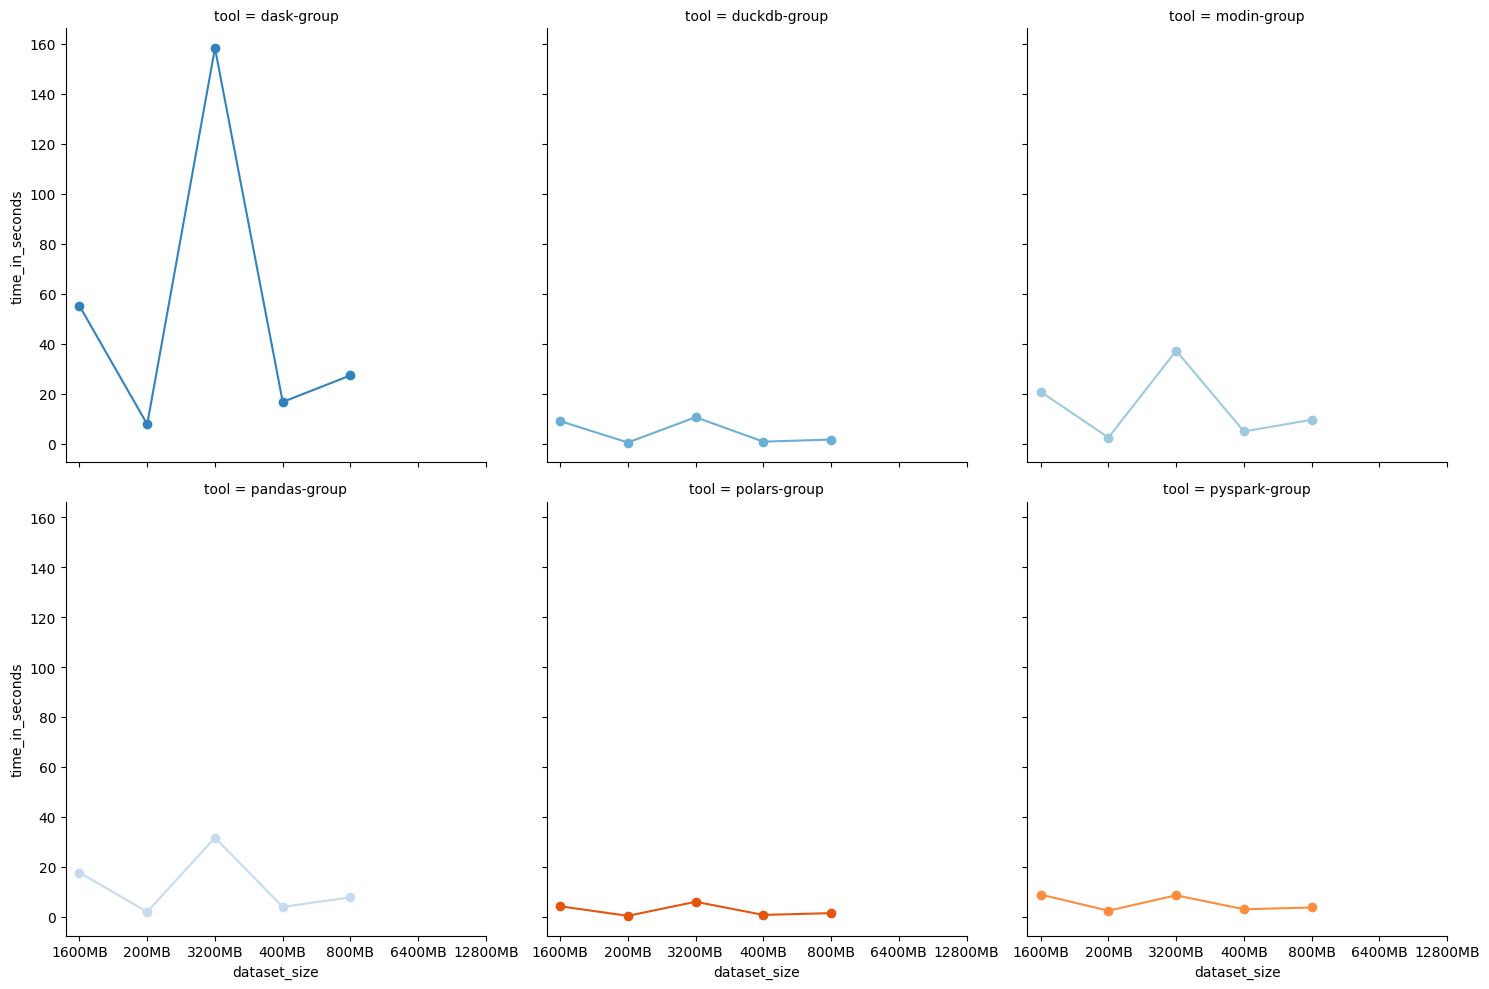

In [26]:
grid = sns.FacetGrid(grouped_filter_benchs.filter(pl.col("cpu_count") != 1), col="tool", hue="tool", palette="tab20c", col_wrap=3, height=5)
grid.map(plt.plot, "dataset_size", "time_in_seconds", marker="o")
grid.set(xticks=DATASET_SIZES)
# grid.set(xticks=np.arange(5), yticks=[-3, 3],
#          xlim=(-.5, 4.5), ylim=(-3.5, 3.5))
grid.fig.tight_layout(w_pad=1)